In [9]:
print("Importing modules...")
import pandas as pd
import numpy as np
import scipy
import sklearn
import skmultilearn
from sklearn.metrics import (accuracy_score, precision_score, f1_score, recall_score, hamming_loss, zero_one_loss)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.model_selection import iterative_train_test_split
print("...Complete")

Importing modules...
...Complete


In [10]:
### Here you are expected to load the dataset, then doing train/test split 80:20 using a fixed seed
### Consequently, the train and test tables must be connected with the rest of the workflow

FINGERPRINT = "Top5" # Top5, Top10, Top15, Top20, Top25

print("Loading datasets...")
df = pd.read_csv("Fingerprint/{0}.csv.gz".format(FINGERPRINT), compression='gzip')

#X = df[df.columns[list(df.columns).index('bitvector0'):]] 
#y = df[df.columns[:list(df.columns).index('bitvector0')]] 
X = df.filter(like='bit', axis=1)  #select rows containing 'bit' 
y = df[df.columns.drop(list(df.filter(regex='bit|row|StringFP')))] #remove columns containing 'bit' and RowID

#X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)#

X_train, y_train, X_test, y_test = iterative_train_test_split(np.array(X), np.array(y), test_size = 0.2)
print("...Complete")

Loading datasets...
...Complete


In [19]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [26]:
y_train.columns = y.columns
y_test.columns = y.columns

In [207]:
''' ========================DEPRECATION==========================Stratefied sampling==================
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

print(sss)       
StratifiedShuffleSplit(n_splits=1,random_state=0)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
'''
    

StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.5,
            train_size=None)
TRAIN: [5 2 3] TEST: [4 1 0]


Counter({(0, 0): 37})

In [217]:
y_unpivot.class

SyntaxError: invalid syntax (<ipython-input-217-d9b3e8c69cec>, line 1)

In [220]:
from skmultilearn.dataset import load_dataset
X1,y1, _, _ = load_dataset('scene', 'undivided')

scene:undivided - does not exists downloading
Downloaded scene-undivided


In [225]:
from collections import Counter
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
Counter(combination for row in get_combination_wise_output_matrix(y1.A, order=2) for combination in row)

Counter({(0, 0): 427,
         (4, 4): 533,
         (0, 4): 38,
         (0, 5): 19,
         (5, 5): 431,
         (1, 1): 364,
         (2, 2): 397,
         (2, 3): 24,
         (3, 3): 433,
         (3, 4): 76,
         (2, 4): 14,
         (4, 5): 1,
         (3, 5): 6,
         (0, 3): 1})

In [ ]:
Counter(combination for row in get_combination_wise_output_matrix(np.array(y), order=2) for combination in row)

In [244]:
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(np.array(y_train), order=2) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(np.array(y_test), order=2) for combination in row)
}).T.fillna(0.0)

,"(0, 0)","(0, 1)","(0, 10)","(0, 11)","(0, 12)","(0, 13)","(0, 14)","(0, 15)","(0, 16)","(0, 17)",...,"(9, 28)","(9, 29)","(9, 30)","(9, 31)","(9, 32)","(9, 33)","(9, 34)","(9, 35)","(9, 36)","(9, 9)"
train,2074.0,157.0,42.0,84.0,90.0,32.0,3.0,36.0,28.0,64.0,...,22.0,30.0,22.0,14.0,24.0,22.0,24.0,23.0,14.0,1247.0
test,481.0,31.0,9.0,22.0,18.0,16.0,3.0,6.0,8.0,12.0,...,5.0,7.0,3.0,3.0,4.0,4.0,5.0,4.0,3.0,288.0


In [254]:
from skmultilearn.model_selection import iterative_train_test_split

X_train, y_train, X_test, y_test = iterative_train_test_split(np.array(X), np.array(y), test_size = 0.2)

In [261]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

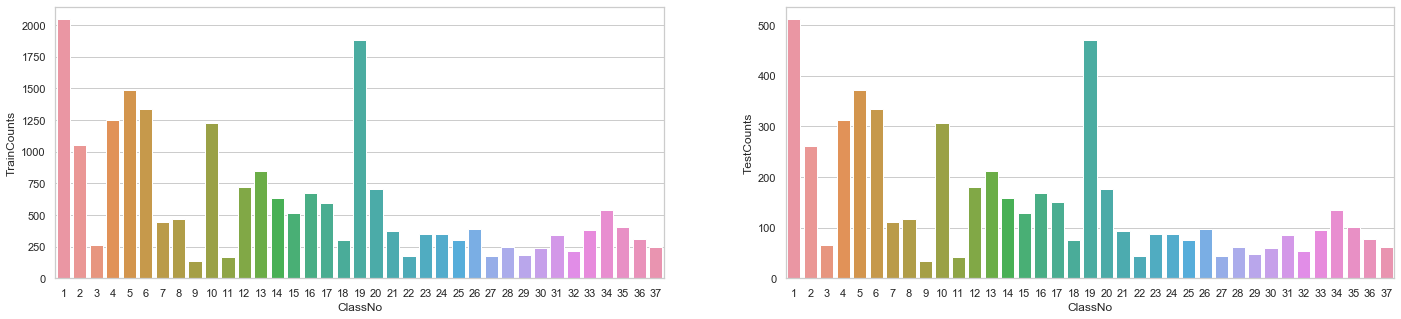

In [266]:
class_counts_train = []
class_counts_test = []
for l in y_train.columns:
    class_counts_train.append(y_train[l].sum())
    class_counts_test.append(y_test[l].sum())
class_distr = pd.DataFrame({'ClassNo':list(range(1,38)),'Class':y_train.columns,'TrainCounts':class_counts_train,'TestCounts':class_counts_test})
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(x="ClassNo", y="TrainCounts", data=class_distr, ax=axs[0])
sns.barplot(x="ClassNo", y="TestCounts", data=class_distr, ax=axs[1])

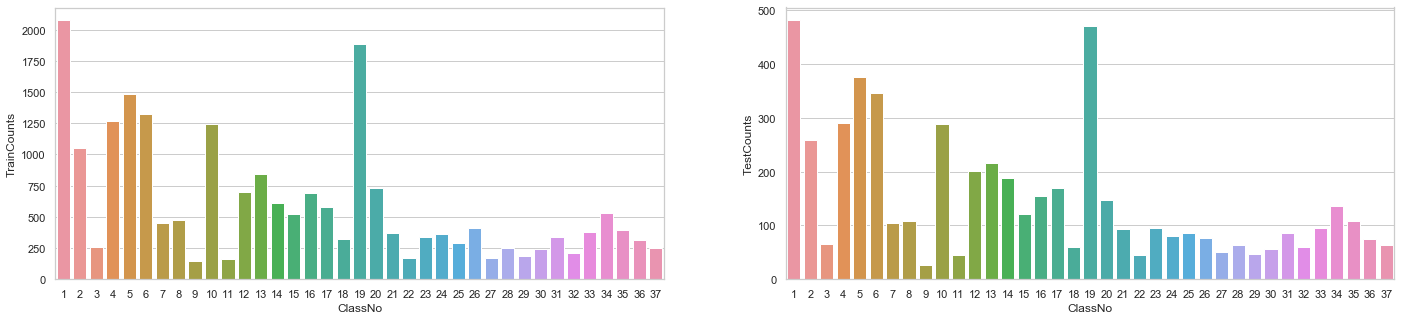

In [268]:
class_counts_train = []
class_counts_test = []
for l in y.columns:
    class_counts_train.append(y_train1[l].sum())
    class_counts_test.append(y_test1[l].sum())
class_distr = pd.DataFrame({'ClassNo':list(range(1,38)),'Class':y.columns,'TrainCounts':class_counts_train,'TestCounts':class_counts_test})
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2)
sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(x="ClassNo", y="TrainCounts", data=class_distr, ax=axs[0])
sns.barplot(x="ClassNo", y="TestCounts", data=class_distr, ax=axs[1])

In [61]:
y.shape

(20142, 37)

In [81]:
y.head()

,C-C Bond Formation (Coupling),C-C Bond Formation (Methylation),C-C Bond Formation (Olefination),C-N Bond Formation (N-arylation),C-N Bond Formation (N-methylation),C-O Bond Formation (Etherification),Functional Conversion (Hydroxy to methoxy),Functional Introduction (Iodination),Synthesis (Pyrazole),Functional Introduction (Bromination),...,Functional Elimination (Debromination),Cleavage (Hydrolysis),Protection (O-Acetyl),C-N Bond Formation (N-alkylation),Functional Conversion (Cyano to carbamoyl),Functional Elimination (Deoxygenation),Functional Conversion (Alcohol to alkene),Functional Elimination (Decarboxylation),Functional Conversion (Reduction),Deprotection (N-Benzyl)
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
pd.melt(y, value_vars =[1, 0]) 

KeyError: "The following 'value_vars' are not present in the DataFrame: [0, 1]"

In [71]:
y_flat = y.unstack().reset_index(name='value')

In [73]:
y_flat.rename(columns={'level_0': 'class', 'level_1': 'rowID'}, inplace=True)

In [203]:
y_unpivot = pd.DataFrame(y_flat[y_flat['value']==1].groupby('rowID').apply(lambda x: list(x['class'])).reset_index(name='classes'))

In [216]:
y_unpivot

,rowID,classes
0,0,"[C-C Bond Formation (Coupling), C-C Bond Forma..."
1,1,[Functional Introduction (Bromination)]
2,2,"[C-C Bond Formation (Coupling), C-N Bond Forma..."
3,3,"[C-C Bond Formation (Coupling), C-C Bond Forma..."
4,4,[Synthesis (Thioether)]
5,5,"[C-N Bond Formation (N-arylation), C-N Bond Fo..."
6,6,"[C-C Bond Formation (Coupling), C-N Bond Forma..."
7,7,"[Functional Conversion (Sulfanyl to sulfinyl),..."
8,8,[C-O Bond Formation (Esterification)]
9,9,[C-C Bond Formation (Coupling)]


In [2]:
'''
print("Loading datasets...")

FINGERPRINT = "FCFP4"

import pickle
X = pickle.load(open("{0}_X.pickle".format(FINGERPRINT), 'rb'))
y = pickle.load(open("{0}_y.pickle".format(FINGERPRINT), 'rb'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)
print("...Complete")
'''

Loading datasets...
...Complete


In [11]:
def set_problem_transformation(clf, method):
    """
    ====================================================================================
                                  Set Problem Transformation
    ====================================================================================
    Key arguments:
        clf     =  scikit-learn classifier (e.g. RandomForestClassifier())
        method  =  scikit-multilearn problem transformation method among the ones below:
        
                   'BR' = BinaryRelevance()
                   'LP' = LabelPowerset()
                   'CC' = ClassifierChain()
    ====================================================================================
    """
    # define methods
    methods = {'BR' : BinaryRelevance(classifier=clf, require_dense=[True,True]),
               'LP' : LabelPowerset(classifier=clf, require_dense=[True,True]),
               'CC' : ClassifierChain(classifier=clf, require_dense=[True,True])}
    
    # set the problem transformation
    if method in methods.keys():
        pt_clf = methods[method]
        return pt_clf
    else:
        return str(method)+" is not contained among the possible methods (Try to use 'BR', 'LP', or 'CC')"

In [31]:
def metrics_problem_transformation(pt_clf, X_train, y_train, X_test, y_test):
    """
    ====================================================================================
                                  Test Problem Transformation
    ====================================================================================
    Key arguments:
        pt_clf   =  scikit-multilearn problem transformation classifier
        X_train  =  pandas dataframe containing the training set values
        y_train  =  pandas dataframe containing the training set labels
        X_test   =  pandas dataframe containing the test set values
        y_test   =  pandas dataframe containing the test set labels
    ====================================================================================
    """    
    # load modules
    import pandas as pd
    from sklearn.metrics import (accuracy_score, precision_score, f1_score, recall_score, hamming_loss, zero_one_loss)
    
    # train
    print("Fitting the function...")
    pt_clf.fit(X_train, y_train)
    print("...Complete")
    
    # predict and convert
    print("Predicting the entries...")
    y_pred = pt_clf.predict(X_test)
    print("...Complete\n")
    y_pred = y_pred.todense(order=None, out=None)
    y_pred = pd.DataFrame(y_pred, index=y_test.index.values, columns=y_test.columns.values)
    
    # metrics
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    hloss = sklearn.metrics.hamming_loss(y_test, y_pred)
    zero_one_loss = sklearn.metrics.zero_one_loss(y_test, y_pred)
    micro_recall = sklearn.metrics.recall_score(y_test, y_pred, average='micro')
    weighted_recall = sklearn.metrics.recall_score(y_test, y_pred, average='weighted')
    micro_precision = sklearn.metrics.precision_score(y_test, y_pred, average='micro')
    weighted_precision = sklearn.metrics.precision_score(y_test, y_pred, average='weighted')
    macro_f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    micro_f1 = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
    weighted_f1 = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
    
    # list metrics and round them
    metrics = [accuracy, hloss, zero_one_loss, micro_recall, weighted_recall,
              micro_precision, weighted_precision, macro_f1, micro_f1, weighted_f1]
    rnd_metrics =  [round(x,2) for x in metrics]
    
    # return metrics
    print (pt_clf)
    print (rnd_metrics)
    print ()
    return metrics


In [32]:
print("Defining the classifiers...")
# define rf classifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=4, 
                            random_state=11, verbose=0, warm_start=False, class_weight=None)

# define svm classifier
svm = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, 
                C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, 
                class_weight=None, verbose=0, random_state=11, max_iter=1000)
print("...Complete")


Defining the classifiers...
...Complete


In [33]:
methods_to_test = ['BR', 'CC', 'LP']
classifiers_to_test = [rf, svm]
error = []
for c in classifiers_to_test:
    for m in methods_to_test:
        try:
            pt_clf = set_problem_transformation(c, m)
            metrics = metrics_problem_transformation(pt_clf, X_train, y_train, X_test, y_test)
            # append metrics into file
            f = open("{0}-metrics.csv".format(FINGERPRINT), "a+")
            fr = open("{0}-metrics.csv".format(FINGERPRINT), "r")
            if(sum(1 for line in fr)==0):
                f.write("method,classifier,accuracy, hloss, zero_one_loss, micro_recall, weighted_recall, micro_precision, weighted_precision, macro_f1, micro_f1, weighted_f1"+"\n")
            fr.close()
            f.write(','.join([m,str(c).split('(')[0],','.join(map(str, [round(x,2) for x in metrics]))])+"\n")
            f.close()
        except Exception as e:
            error.append(e)

Fitting the function...
...Complete
Predicting the entries...
...Complete

BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=10, n_jobs=4,
                                                  oob_score=Fals

U:\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
U:\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


U:\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
U:\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
U:\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


...Complete
Predicting the entries...
...Complete



U:\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
U:\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ClassifierChain(classifier=LinearSVC(C=1.0, class_weight=None, dual=True,
                                     fit_intercept=True, intercept_scaling=1,
                                     loss='squared_hinge', max_iter=1000,
                                     multi_class='ovr', penalty='l2',
                                     random_state=11, tol=0.0001, verbose=0),
                order=None, require_dense=[True, True])
[0.16, 0.04, 0.84, 0.15, 0.15, 0.62, 0.39, 0.24, 0.24, 0.2]

Fitting the function...


U:\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


...Complete
Predicting the entries...
...Complete

LabelPowerset(classifier=LinearSVC(C=1.0, class_weight=None, dual=True,
                                   fit_intercept=True, intercept_scaling=1,
                                   loss='squared_hinge', max_iter=1000,
                                   multi_class='ovr', penalty='l2',
                                   random_state=11, tol=0.0001, verbose=0),
              require_dense=[True, True])
[0.28, 0.05, 0.72, 0.37, 0.37, 0.33, 0.32, 0.34, 0.34, 0.33]



In [15]:
for e in error:
    print(e)

'numpy.ndarray' object has no attribute 'index'
'numpy.ndarray' object has no attribute 'index'
'numpy.ndarray' object has no attribute 'index'
'numpy.ndarray' object has no attribute 'index'


In [ ]:
print(('='*50+'I WILL BE BACK AT 20:00'+'='*50+'\n')*10)